In [104]:
#from pycocotools.cocoeval import COCOeval
#from pycocotools.coco import COCO
from torchcore.evaluation.coco_tools import COCO, COCOeval

gt_path = 'data/SVHN_test.json'
result_path = 'testtemp_result_sample.json'
cocoGt=COCO(gt_path)
cocoDt=cocoGt.loadRes(result_path)
imgIds=sorted(cocoGt.getImgIds())

# running evaluation
cocoEval = COCOeval(cocoGt,cocoDt,'bbox')

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
Loading and preparing results...
DONE (t=9.39s)
creating index...
index created!


In [105]:
cocoEval.evaluate()
cocoEval.accumulate()
#cocoEval.summarize_per_category()
cocoEval.summarize()

Running per image evaluation...
Evaluate annotation type *bbox*
Per image evaluation DONE (t=34.04s).
Accumulating evaluation results...
Accumulating DONE (t=18.53s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.401
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.881
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.281
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.402
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.407
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.458
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.460
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.524
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.526
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.523
 Average Recall     (AR) @[ IoU=0

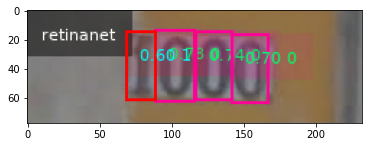

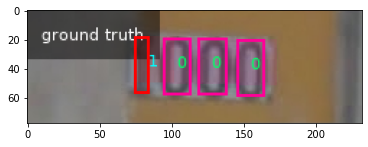

In [138]:
%matplotlib inline
import random
from torchcore.tools.visulize_tools import visulize_coco_result
from matplotlib import pyplot as plt
im_id = random.choice(imgIds)
#print(im_id)
img_folder = 'data/test/'
image_det, image_gt = visulize_coco_result(cocoEval,im_id, img_folder, category_num=10, with_gt=True,thresh=0.5,font_size=11, box_line_width=2,box_opacity=0.1,tag='retinanet', tag_font_size=11) 
plt.figure()
plt.imshow(image_det)
plt.figure()
plt.imshow(image_gt)